In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
with_mask_file= os.listdir('/content/drive/MyDrive/Face_mask and withoutmask/dataset/with mask')

In [40]:
print (with_mask_file[0:5])
print(with_mask_file[-5:])

['101-with-mask.jpg', '159-with-mask.jpg', 'prajna.jpg', '57-with-mask.jpg', 'augmented_image_113.jpg']
['augmented_image_59.jpg', 'augmented_image_34.jpg', '304-with-mask.jpg', '307-with-mask.jpg', 'augmented_image_90.jpg']


In [41]:
without_mask_file= os.listdir('/content/drive/MyDrive/Face_mask and withoutmask/dataset/without mask')
print (without_mask_file[0:5])
print(without_mask_file[-5:])


['20.jpg', '28.jpg', '81.jpg', '154.jpg', 'augmented_image_5.jpg']
['augmented_image_199.jpg', '447.jpg', '11.jpg', '141.jpg', '267.jpg']


In [42]:
print('Number of with mask images', len(with_mask_file))
print('Number of without mask images', len(without_mask_file))


Number of with mask images 690
Number of without mask images 686


# Creating Labelse for the two class of image

with mask -->1
without mask --->0

In [43]:
# create the labels
with_mask_labels= [1]*690
without_mask_labels=[0]*686

In [44]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [45]:
print(len(with_mask_labels))
print(len(without_mask_labels))

690
686


In [46]:
labels= with_mask_labels+without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1376
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying the images

<function matplotlib.pyplot.show(close=None, block=None)>

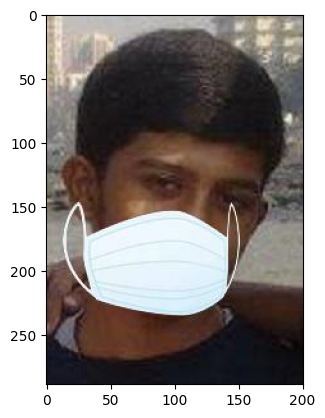

In [47]:
# displaying with mask image


img= mpimg.imread('/content/drive/MyDrive/Face_mask and withoutmask/dataset/with mask/159-with-mask.jpg')
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

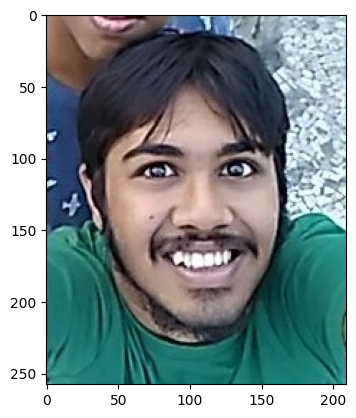

In [48]:
# displaying without mask image


img= mpimg.imread('/content/drive/MyDrive/Face_mask and withoutmask/dataset/without mask/81.jpg')
imgplot = plt.imshow(img)
plt.show

# Image processing

1. Resize the image
2. Convert the images to numpy array

In [49]:
# convert images to numpy arrays+

with_mask_path=('/content/drive/MyDrive/Face_mask and withoutmask/dataset/with mask/')

data=[]

for img_file in with_mask_file:

  image= Image.open(with_mask_path+ img_file)
  image= image.resize((128, 128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)


without_mask_path=('/content/drive/MyDrive/Face_mask and withoutmask/dataset/without mask/')



for img_file in without_mask_file:

  image= Image.open(without_mask_path+ img_file)
  image= image.resize((128, 128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)

In [50]:
type(data)

list

In [51]:
len(data)

1376

In [52]:
data[0]

array([[[252, 251, 251],
        [252, 250, 251],
        [254, 252, 254],
        ...,
        [252, 255, 255],
        [253, 255, 255],
        [255, 255, 255]],

       [[248, 253, 255],
        [250, 251, 253],
        [242, 238, 239],
        ...,
        [244, 238, 237],
        [241, 237, 236],
        [241, 237, 236]],

       [[254, 254, 251],
        [254, 250, 244],
        [148, 126, 115],
        ...,
        [137,  97,  87],
        [120,  87,  73],
        [114,  87,  71]],

       ...,

       [[254, 253, 251],
        [244, 255, 255],
        [ 88, 108, 203],
        ...,
        [ 41,  71, 173],
        [ 95, 122, 217],
        [ 76, 100, 199]],

       [[254, 253, 249],
        [246, 255, 255],
        [ 89, 108, 200],
        ...,
        [ 75, 104, 187],
        [ 75,  97, 185],
        [ 19,  35, 143]],

       [[255, 254, 249],
        [247, 255, 255],
        [ 75,  92, 183],
        ...,
        [155, 183, 238],
        [112, 129, 197],
        [ 28,  36, 144]]

In [53]:
type(data[0])

numpy.ndarray

In [54]:
data[0].shape

(128, 128, 3)

In [55]:
# converting image list and label list to numpy array

X= np.array(data)
Y= np.array(labels)

In [56]:
type(X)

numpy.ndarray

In [57]:
type(Y)

numpy.ndarray

In [58]:
print(X.shape)
print(Y.shape)

(1376, 128, 128, 3)
(1376,)


In [59]:
print(Y)

[1 1 1 ... 0 0 0]


In [60]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1376, 128, 128, 3) (1100, 128, 128, 3) (276, 128, 128, 3)


In [62]:
# scalling the data

X_train_scaled= X_train/255
X_test_scaled= X_test/255

In [63]:
X_train_scaled[0]

array([[[0.98039216, 0.98039216, 0.97254902],
        [0.98039216, 0.98039216, 0.97254902],
        [0.98431373, 0.98431373, 0.97647059],
        ...,
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059]],

       [[0.98039216, 0.98039216, 0.97254902],
        [0.98039216, 0.98039216, 0.97254902],
        [0.98431373, 0.98431373, 0.97647059],
        ...,
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059]],

       [[0.98039216, 0.98039216, 0.97254902],
        [0.98039216, 0.98039216, 0.97254902],
        [0.98431373, 0.98431373, 0.97647059],
        ...,
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

Bolding a Convolutional Neural Networks(CNN)

In [64]:
import tensorflow as tf
from tensorflow import keras


In [65]:

num_of_classes=2

model=keras.Sequential()


model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', ))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [66]:
# Compile the neural network


model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [67]:
# Training the neural network


history= model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
31/31 [==============================] - 2s 26ms/step - loss: 0.8189 - acc: 0.6091 - val_loss: 0.4895 - val_acc: 0.8818
Epoch 2/5
31/31 [==============================] - 1s 21ms/step - loss: 0.3662 - acc: 0.8606 - val_loss: 0.1281 - val_acc: 0.9545
Epoch 3/5
31/31 [==============================] - 1s 22ms/step - loss: 0.1787 - acc: 0.9414 - val_loss: 0.0474 - val_acc: 0.9818
Epoch 4/5
31/31 [==============================] - 1s 32ms/step - loss: 0.1067 - acc: 0.9687 - val_loss: 0.0454 - val_acc: 0.9818
Epoch 5/5
31/31 [==============================] - 1s 39ms/step - loss: 0.0738 - acc: 0.9727 - val_loss: 0.0188 - val_acc: 0.9909


In [68]:
loss, accuracy= model.evaluate(X_test, Y_test)
print('Test Accuracy', accuracy)

9/9 [==============================] - 0s 6ms/step - loss: 47.8569 - acc: 0.9384
Test Accuracy 0.9384058117866516


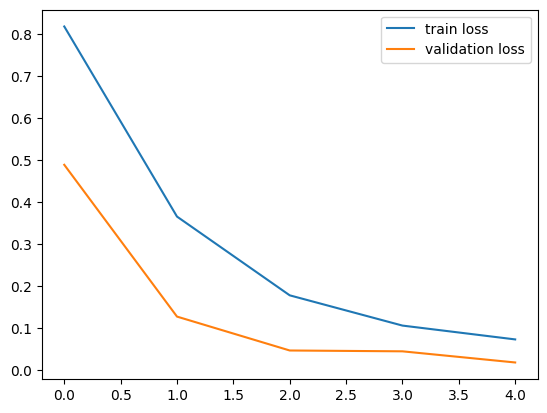

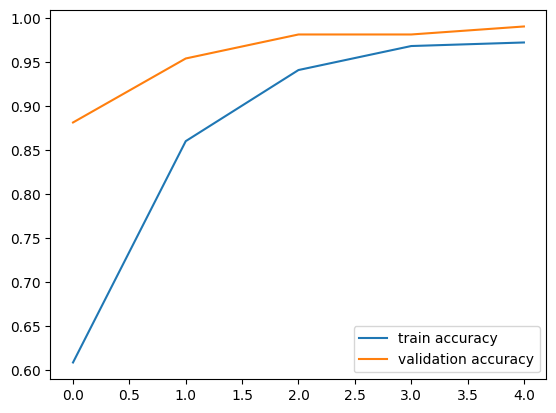

In [69]:
h= history
# plot the loss value

plt.plot(h.history['loss'], label= 'train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy

plt.plot(h.history['acc'], label= 'train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

path of the image to be predicted/content/drive/MyDrive/Face_mask and withoutmask/mask.jpg


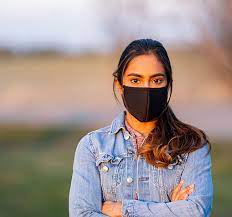

1/1 [==============================] - 0s 68ms/step
[[0.17028739 0.7788815 ]]
1
The person in the image is wearing  a mask


In [70]:
input_image_path=input('path of the image to be predicted')

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize= cv2.resize(input_image,(128,128))
input_image_scaled= input_image_resize/255
input_image_reshaped= np.reshape(input_image_scaled,[1,128,128,3])

input_prediction= model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('The person in the image is wearing  a mask')

else:
  print('The person in the image is not wearing the mask')

path of the image to be predicted/content/drive/MyDrive/Face_mask and withoutmask/Rasooli.PNG


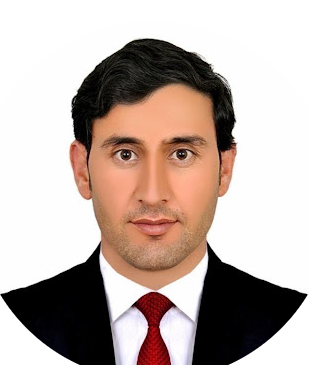

1/1 [==============================] - 0s 17ms/step
[[6.2706106e-04 9.9888080e-01]]
1
The person in the image is not wearing the mask


In [72]:


input_image_path=input('path of the image to be predicted')

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize= cv2.resize(input_image,(128,128))
input_image_scaled= input_image_resize/255
input_image_reshaped= np.reshape(input_image_scaled,[1,128,128,3])

input_prediction= model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label= np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label>1:

  print('The person in the image is wearing  a mask')

else:
  print('The person in the image is not wearing the mask')